In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from heapq import nlargest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [4]:
city = pd.read_csv('./Dataset/City.csv')
places = pd.read_csv('./Dataset/Places.csv')
locs = pd.read_csv('./Dataset/Review_db.csv')
locs

,City,Place,Review,Rating,Name,Date,Raw_Review
0,Aamby Valley City,19 Degree North,aamby valley beautiful place clear blue skies ...,5,Anonymous,NaN,Aamby valley is a beautiful place with its cle...
1,Aamby Valley City,19 Degree North,executed obt akshay thanx team thoroughly enjo...,4,Anonymous,NaN,Very well executed obt by Akshay.... Thanx as ...
2,Aamby Valley City,19 Degree North,awesome experience atv tracts obstacles mainta...,5,Anonymous,NaN,Awesome experience at the ATV\nTracts and obst...
3,Aamby Valley City,19 Degree North,visited aamby valley yesterday short excursion...,4,Anonymous,NaN,we visited the Aamby Valley yesterday for shor...
4,Aamby Valley City,19 Degree North,far mumbai place finest adventure places visit...,5,Anonymous,NaN,"Not far from Mumbai, this place is one of the ..."
...,...,...,...,...,...,...,...
1482461,Zuluk,Zuluk Wildlife Area,zuluk week march mst virgin unexplored region ...,3,Anonymous,NaN,We had been to zuluk in the last week of march...
1482462,Zuluk,Zuluk Wildlife Area,planned visit eastern sikkim time covered stat...,3,Anonymous,NaN,We planned to visit eastern part of Sikkim thi...
1482463,Zuluk,Zuluk Wildlife Area,excellent watched place east sikkim visited pl...,5,Anonymous,NaN,A excellent & must watched place for east sikk...
1482464,Zuluk,Zuluk Wildlife Area,beautiful areas sikkim falls eastern sikkim an...,4,Anonymous,NaN,One of the most beautiful areas in Sikkim... i...


#Clean Locs Dataframe


In [263]:
locs['City_Place']= locs['Place'] + '-' + locs['City']
locs

,City,Place,Review,Rating,Name,Date,Raw_Review,City_Place
0,Aamby Valley City,19 Degree North,aamby valley beautiful place clear blue skies ...,5,Anonymous,NaN,Aamby valley is a beautiful place with its cle...,19 Degree North-Aamby Valley City
1,Aamby Valley City,19 Degree North,executed obt akshay thanx team thoroughly enjo...,4,Anonymous,NaN,Very well executed obt by Akshay.... Thanx as ...,19 Degree North-Aamby Valley City
2,Aamby Valley City,19 Degree North,awesome experience atv tracts obstacles mainta...,5,Anonymous,NaN,Awesome experience at the ATV\nTracts and obst...,19 Degree North-Aamby Valley City
3,Aamby Valley City,19 Degree North,visited aamby valley yesterday short excursion...,4,Anonymous,NaN,we visited the Aamby Valley yesterday for shor...,19 Degree North-Aamby Valley City
4,Aamby Valley City,19 Degree North,far mumbai place finest adventure places visit...,5,Anonymous,NaN,"Not far from Mumbai, this place is one of the ...",19 Degree North-Aamby Valley City
...,...,...,...,...,...,...,...,...
1482461,Zuluk,Zuluk Wildlife Area,zuluk week march mst virgin unexplored region ...,3,Anonymous,NaN,We had been to zuluk in the last week of march...,Zuluk Wildlife Area-Zuluk
1482462,Zuluk,Zuluk Wildlife Area,planned visit eastern sikkim time covered stat...,3,Anonymous,NaN,We planned to visit eastern part of Sikkim thi...,Zuluk Wildlife Area-Zuluk
1482463,Zuluk,Zuluk Wildlife Area,excellent watched place east sikkim visited pl...,5,Anonymous,NaN,A excellent & must watched place for east sikk...,Zuluk Wildlife Area-Zuluk
1482464,Zuluk,Zuluk Wildlife Area,beautiful areas sikkim falls eastern sikkim an...,4,Anonymous,NaN,One of the most beautiful areas in Sikkim... i...,Zuluk Wildlife Area-Zuluk


In [264]:
locs.groupby('Place').count()

,City,Review,Rating,Name,Date,Raw_Review,City_Place
Place,,,,,,,
1 MG Lido Mall,107,107,107,107,0,107,107
10 Acres Mall,5,5,5,5,0,5,5
1008 Lingam Temple,90,90,90,90,0,90,90
101 Ft. Hanuman Idol,4,4,4,4,0,4,4
108 Feet Height Statue Of Basaveshwara,10,10,10,10,0,10,10
...,...,...,...,...,...,...,...
osian camel and jeep safari,33,33,33,33,0,33,33
shree jayadurgaparameshwari Temple,1,1,1,1,0,1,1
tour2sundarban,1,1,1,1,0,1,1


In [265]:
#Create new dataFrame to manulate with locs data

rat_review=locs[['City','Place','City_Place']]
rat_review=rat_review.drop_duplicates()

In [266]:
rat_count =locs.groupby('City_Place').count()['Rating'].reset_index()
rat_count.rename(columns={'Rating':'No. of rating'},inplace=True)
rat_count

,City_Place,No. of rating
0,1 MG Lido Mall-Bengaluru,107
1,10 Acres Mall-Ahmedabad,5
2,1008 Lingam Temple-Salem,90
3,101 Ft. Hanuman Idol-Chhindwara,4
4,108 Feet Height Statue Of Basaveshwara-Bidar,10
...,...,...
15234,osian camel and jeep safari-Osian,33
15235,shree jayadurgaparameshwari Temple-Udupi,1
15236,tour2sundarban-Canning,1
15237,unseen_uttrakhand-Tanakpur,1


In [267]:
rat = pd.DataFrame(locs.groupby('City_Place')['Rating'].mean())
rat

,Rating
City_Place,
1 MG Lido Mall-Bengaluru,4.261682
10 Acres Mall-Ahmedabad,3.200000
1008 Lingam Temple-Salem,4.300000
101 Ft. Hanuman Idol-Chhindwara,4.500000
108 Feet Height Statue Of Basaveshwara-Bidar,4.000000
...,...
osian camel and jeep safari-Osian,4.575758
shree jayadurgaparameshwari Temple-Udupi,5.000000
tour2sundarban-Canning,5.000000


In [268]:
rat_count= rat_count.merge(rat, on='City_Place')
rat_review = rat_review.merge(rat_count, on= 'City_Place')
rat_review

,City,Place,City_Place,No. of rating,Rating
0,Aamby Valley City,19 Degree North,19 Degree North-Aamby Valley City,17,4.588235
1,Abhaneri,Chand Baori (Step well),Chand Baori (Step well)-Abhaneri,749,4.248331
2,Abhaneri,Harshat Mata Temple,Harshat Mata Temple-Abhaneri,118,3.915254
3,Achooranam,Wayanad Tea Museum,Wayanad Tea Museum-Achooranam,44,4.136364
4,Acharapakkam,Mazhai Malai Madha Shrine,Mazhai Malai Madha Shrine-Acharapakkam,1,5.000000
...,...,...,...,...,...
15234,Ziro,Pine Grove,Pine Grove-Ziro,6,4.166667
15235,Zuluk,Zuluk Wildlife Area,Zuluk Wildlife Area-Zuluk,92,4.043478
15236,Zuluk,Thambi View Point,Thambi View Point-Zuluk,14,4.142857
15237,Ziro,Tarin Fish Farm,Tarin Fish Farm-Ziro,7,4.000000


In [269]:
#Filter out most voted reviews and ratings

rat_review = rat_review[rat_review['No. of rating']>100].sort_values('Rating', ascending = False)
rat_review.head()

,City,Place,City_Place,No. of rating,Rating
5347,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062
5366,Amer,EleSafari,EleSafari-Amer,571,4.898424
5419,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721
9503,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595
6838,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788


In [270]:
#Add reviews column into this dataFrame form locs

reviews=[]
for place in rat_review['City_Place']:
  df = locs[locs['City_Place']==place]['Review'].drop_duplicates()
  reviews.append(df.sum())
rat_review['Review']=reviews
rat_review.head()

,City,Place,City_Place,No. of rating,Rating,Review
5347,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062,nice meet carcan ambre fort thank explicationh...
5366,Amer,EleSafari,EleSafari-Amer,571,4.898424,amazing time lovely people elesafari elephant ...
5419,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,election day attractions closed driver dohi re...
9503,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595,best experiences west coast st went dsd dive k...
6838,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788,couples trip appreciable services lively exper...


Analysis with Places and City datasets


In [271]:
city.head()

,City,Ratings,Ideal_duration,Best_time_to_visit,City_desc
0,Manali,4.5,2-4,October-June,[' One of the most popular hill stations in Hi...
1,Leh Ladakh,4.6,5-7,JulyOctober,"["" Ladakh is a union territory in the Kashmir ..."
2,Coorg,4.2,2-3,September-June,[' Located amidst imposing mountains in Karnat...
3,Andaman,4.5,4-6,October-March,[' Replete with turquoise blue water beaches a...
4,Lakshadweep,4.0,4-6,September-February,"["" Formerly known as Laccadive Islands, Laksha..."


In [272]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                100 non-null    object 
 1   Ratings             100 non-null    float64
 2   Ideal_duration      100 non-null    object 
 3   Best_time_to_visit  28 non-null     object 
 4   City_desc           99 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [273]:
city[city['Best_time_to_visit'].isna()]

,City,Ratings,Ideal_duration,Best_time_to_visit,City_desc
8,Gangtok,4.4,2-4,NaN,"[' Incredibly alluring, pleasantly boisterous ..."
10,Varkala,4.5,1-2,NaN,"["" Varkala is a coastal town in the southern p..."
14,Darjeeling,4.3,2-3,NaN,[' The previous summer capital of India under ...
15,Nainital,4.3,2-3,NaN,[' Nainital is a charming hill station located...
19,Lonavala,4.1,1-2,NaN,[' Situated in the Sahyadri range of the Weste...
...,...,...,...,...,...
95,Pushkar,4.0,1-2,NaN,[' Pushka is a small temple town located aroun...
96,Chittorgarh,4.1,1,NaN,"[' Located in South-Eastern Rajasthan, Chittor..."
97,Nahan,3.9,1-2,NaN,"[' Away from the buzzing crowd of the city, Na..."
98,Lavasa,3.9,1,NaN,"["" Known as India's newest hill station, the L..."


In [274]:
city[city['City_desc'].isna()]

,City,Ratings,Ideal_duration,Best_time_to_visit,City_desc
52,Shirdi,4.4,1-2,NaN,NaN


In [275]:
city['City'].duplicated().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


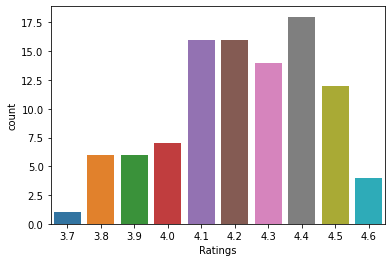

In [276]:
sns.countplot(city['Ratings'])

In [277]:
places.head()

,City,Place,Ratings,Distance,Place_desc
0,Manali,1. Capture the Sceneries of Old Manali,3.9,2 km from city center,On the other side of the Manalsu river is a p...
1,Manali,2. Engage in the Adventures of Solang Valley,4.6,8 km from city center,Solang Valley is one of the most popular tour...
2,Manali,3. Jogini Waterfall,4.6,4 km from city center,Jogini Waterfall is located about 3 kilometre...
3,Manali,4. Hadimba Temple,4.4,1 km from city center,"Hadimba temple, away from the hustle and bust..."
4,Manali,5. Rohtang Pass,4.4,16 km from city center,Rohtang pass is the stretch which connects Ma...


In [278]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2989 non-null   object 
 1   Place       2989 non-null   object 
 2   Ratings     1669 non-null   float64
 3   Distance    2973 non-null   object 
 4   Place_desc  2989 non-null   object 
dtypes: float64(1), object(4)
memory usage: 116.9+ KB


In [279]:
places[places['Ratings'].isna()]

,City,Place,Ratings,Distance,Place_desc
5,Manali,6. Parvati Valley,NaN,6 out of 50 places to visit in Manali,Parvati Valley is famous for the backpacker h...
7,Manali,8. Gulp some Maggi by the Jana Waterfall,NaN,11 km from city center,Jana Waterfall is a 30 feet high watefall loc...
8,Manali,9. Arjun Gufa,NaN,0 km from city center,Arjun Gufa is considered to be a legendary na...
12,Manali,13. Atal Tunnel,NaN,17 km from city center,"Also referred to as the Rohtang Tunnel, Atal ..."
13,Manali,14. Sissu,NaN,27 km from city center,"Also known as Khwaling, Sissu in Lahaul, Hima..."
...,...,...,...,...,...
2973,Nahan,19. Kangojodi,NaN,13 km from city center,Kangojodi is an offbeat destination nestled i...
2976,Lavasa,2. Lakeside Promenade,NaN,0 km from city center,Lakeside Promenade is a tourist attraction in...
2977,Lavasa,3. Bamboosa,NaN,0 km from city center,Bamboosa is a cultural centre in Lavasa highl...
2978,Lavasa,4. Temghar Dam,NaN,0 km from city center,Temghar Dam is a massive dam built on the riv...


In [280]:
places[places['City']=='Kolkata']

,City,Place,Ratings,Distance,Place_desc
1041,Kolkata,1. Marvel at the Victoria Memorial,4.5,4 km from city center,The Victoria Memorial is a large marble build...
1042,Kolkata,2. Fort William,4.4,3 km from city center,Fort William is a fort built in Kolkata on th...
1043,Kolkata,3. Belur Math,4.4,7 km from city center,Belur Mutt is the headquarters of the Ramakri...
1044,Kolkata,4. Evening Walk along the Howrah Bridge,4.4,2 km from city center,Located over the Hooghly river in West Bengal...
1045,Kolkata,5. Birla Planetarium,4.4,3 km from city center,"The Birla Planetarium in Kolkata, is the larg..."
1046,Kolkata,6. Indian Museum,4.4,2 km from city center,The Indian Museum is one of the oldest museum...
1047,Kolkata,7. Marble Palace Mansion,3.7,2 km from city center,The Marble palace near the Chorbagan in North...
1048,Kolkata,8. Mother House,3.7,3 km from city center,This is the place where the Tomb of Mother Te...
1049,Kolkata,9. Take a tour of Science city,3.8,5 km from city center,"One of its kind in India, the Science city wa..."
1050,Kolkata,10. St. Paul's Cathedral,3.8,4 km from city center,Said to be the first cathedral built in the o...


In [281]:
city['City'].nunique

<bound method IndexOpsMixin.nunique of 0          Manali
1      Leh Ladakh
2           Coorg
3         Andaman
4     Lakshadweep
         ...     
95        Pushkar
96    Chittorgarh
97          Nahan
98         Lavasa
99         Poovar
Name: City, Length: 100, dtype: object>

In [282]:
places['Place'].nunique()

2974

In [283]:
rat_review.head()

,City,Place,City_Place,No. of rating,Rating,Review
5347,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062,nice meet carcan ambre fort thank explicationh...
5366,Amer,EleSafari,EleSafari-Amer,571,4.898424,amazing time lovely people elesafari elephant ...
5419,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,election day attractions closed driver dohi re...
9503,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595,best experiences west coast st went dsd dive k...
6838,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788,couples trip appreciable services lively exper...


In [284]:
places['Place']=places['Place'].apply(lambda x: x.split('.')[1][1:])
places

,City,Place,Ratings,Distance,Place_desc
0,Manali,Capture the Sceneries of Old Manali,3.9,2 km from city center,On the other side of the Manalsu river is a p...
1,Manali,Engage in the Adventures of Solang Valley,4.6,8 km from city center,Solang Valley is one of the most popular tour...
2,Manali,Jogini Waterfall,4.6,4 km from city center,Jogini Waterfall is located about 3 kilometre...
3,Manali,Hadimba Temple,4.4,1 km from city center,"Hadimba temple, away from the hustle and bust..."
4,Manali,Rohtang Pass,4.4,16 km from city center,Rohtang pass is the stretch which connects Ma...
...,...,...,...,...,...
2984,Poovar,The Fishing Village,3.1,11 km from city center,A village lying in the proximity of Poovar is...
2985,Poovar,Cruises,3.1,1 km from city center,Amid the crystal clear ripples of water and s...
2986,Poovar,Kovalam Beach,3.1,12 km from city center,A captivating beach with nature's beauty at i...
2987,Poovar,Boat Race,3.1,2 km from city center,Adrenaline rushing snake boat races are a spe...


In [285]:
city['City_desc'].fillna("",inplace = True)
city['City_desc']=city['City_desc'].apply(lambda x : "".join(x[3:-2].split("\'")))
city

,City,Ratings,Ideal_duration,Best_time_to_visit,City_desc
0,Manali,4.5,2-4,October-June,One of the most popular hill stations in Himac...
1,Leh Ladakh,4.6,5-7,JulyOctober,Ladakh is a union territory in the Kashmir reg...
2,Coorg,4.2,2-3,September-June,Located amidst imposing mountains in Karnataka...
3,Andaman,4.5,4-6,October-March,Replete with turquoise blue water beaches and ...
4,Lakshadweep,4.0,4-6,September-February,"Formerly known as Laccadive Islands, Lakshadwe..."
...,...,...,...,...,...
95,Pushkar,4.0,1-2,NaN,Pushka is a small temple town located around 1...
96,Chittorgarh,4.1,1,NaN,"Located in South-Eastern Rajasthan, Chittorgar..."
97,Nahan,3.9,1-2,NaN,"Away from the buzzing crowd of the city, Nahan..."
98,Lavasa,3.9,1,NaN,"Known as Indias newest hill station, the Lavas..."


In [286]:
rat_review['City_Place'].duplicated().sum()

0

In [287]:
places['Place']= places['Place'].apply(lambda x:x.lower())
places

,City,Place,Ratings,Distance,Place_desc
0,Manali,capture the sceneries of old manali,3.9,2 km from city center,On the other side of the Manalsu river is a p...
1,Manali,engage in the adventures of solang valley,4.6,8 km from city center,Solang Valley is one of the most popular tour...
2,Manali,jogini waterfall,4.6,4 km from city center,Jogini Waterfall is located about 3 kilometre...
3,Manali,hadimba temple,4.4,1 km from city center,"Hadimba temple, away from the hustle and bust..."
4,Manali,rohtang pass,4.4,16 km from city center,Rohtang pass is the stretch which connects Ma...
...,...,...,...,...,...
2984,Poovar,the fishing village,3.1,11 km from city center,A village lying in the proximity of Poovar is...
2985,Poovar,cruises,3.1,1 km from city center,Amid the crystal clear ripples of water and s...
2986,Poovar,kovalam beach,3.1,12 km from city center,A captivating beach with nature's beauty at i...
2987,Poovar,boat race,3.1,2 km from city center,Adrenaline rushing snake boat races are a spe...


In [288]:
def summarize(text):
  if text.count(". ") > 20:
      length = int(round(text.count(". ")/10, 0))
  else:
      length = 1

  nopuch =[char for char in text if char not in string.punctuation]
  nopuch = "".join(nopuch)

  processed_text = [word for word in nopuch.split() if word.lower() not in nltk.corpus.stopwords.words('english')]

  word_freq = {}
  for word in processed_text:
      if word not in word_freq:
          word_freq[word] = 1
      else:
          word_freq[word] = word_freq[word] + 1

  max_freq = max(word_freq.values())
  for word in word_freq.keys():
      word_freq[word] = (word_freq[word]/max_freq)

  sent_list = nltk.sent_tokenize(text)
  sent_score = {}
  for sent in sent_list:
      for word in nltk.word_tokenize(sent.lower()):
          if word in word_freq.keys():
              if sent not in sent_score.keys():
                  sent_score[sent] = word_freq[word]
              else:
                  sent_score[sent] = sent_score[sent] + word_freq[word]

  summary_sents = nlargest(length, sent_score, key=sent_score.get)
  summary = " ".join(summary_sents)
  return summary

In [289]:
c =[]
p =[]
r =[]
s=0
for c_i in rat_review['City'].unique():
  for p_i in rat_review[rat_review['City']==c_i]['Place']:
    c.append(c_i)
    p.append(p_i)
    places['Place']= places['Place'].apply(lambda x:x.lower())
    place_st = places[places['City']==c_i]
    place_st = place_st[place_st['Place'].str.contains(p_i.lower())]
     

    if not place_st.isnull().values.all():
      # p_st_df = place_st[place_st['City']==c_i]
      r.append(place_st.iloc[0]['Place_desc'])
    else:
      r.append('-')
pl = pd.DataFrame(columns=['City','Place','City_Place','Place_desc'])
pl['City']=c
pl['Place']= p
pl['City_Place']=  pl['Place']+ '-' + pl['City']
pl['Place_desc']=r
pl= pl.drop(columns=['City','Place'])
pl.set_index('City_Place')
s

<ipython-input-289-b3636abb1f89>:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  place_st = place_st[place_st['Place'].str.contains(p_i.lower())]


0

In [290]:
pl[pl['Place_desc']!='-']

,City_Place,Place_desc
8,Central Park-Jaipur,The Central Park of Jaipur is the largest par...
17,Nahargarh Fort-Jaipur,"Nahargarh Fort, situated on the outskirts of ..."
20,Albert Hall Museum-Jaipur,"Situated in the Ram Niwas Garden, Albert Hall..."
23,Panna Meena ka Kund-Jaipur,Panna Meena ka Kund in Jaipur is one of the m...
25,Jaigarh Fort-Jaipur,Jaigarh Fort is a grand structure perched on ...
...,...,...
1963,Tomb of Mughal Emperor Aurangzeb-Aurangabad,"Situated in Khuldabad village, about 25 kilom..."
2003,Dwarkadhish Temple-Mathura,"The Dwarkadhish Temple, touted as one of the ..."
2005,Krishna Janmabhoomi Temple-Mathura,It is believed that this temple is situated a...
2006,Sri Krishna Janmabhoomi Temple Complex-Mathura,It is believed that this temple is situated a...


In [291]:
c =[]
r =[]
for i in rat_review['City']:
  c.append(i)
  city_st = city[city['City'].str.contains(i)]
  c_st = city_st.isnull().values.all()
  if not c_st and city_st.iloc[0]['City_desc']!='':
    r.append(summarize(city_st.iloc[0]['City_desc']))
  else:
    r.append('-')
ct = rat_review[['City_Place','Rating']]
# ct['City']= c
ct['City_desc']=r
ct = ct.drop(columns=['Rating'])
ct

<ipython-input-291-f82ecb4b12e8>:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  city_st = city[city['City'].str.contains(i)]
<ipython-input-291-f82ecb4b12e8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct['City_desc']=r


,City_Place,City_desc
5347,Ele Experience Farm-Jaipur,With the old city surrounded by walls and gate...
5366,EleSafari-Amer,-
5419,Make Bike Trip-Jaipur,With the old city surrounded by walls and gate...
9503,West Coast Adventures-Murdeshwar,-
6838,Seasonz India-Aluva,-
...,...,...
12214,Ruined Temple/Church of Dhanushkodi-Rameswaram,-
6944,Kohima War Cemetery-Kohima,-
6366,Dras War Memorial-Kargil,-
11575,Viper Island-South Andaman Island,-


In [292]:
rat_review=rat_review.merge(ct,on='City_Place')
rat_review=rat_review.merge(pl, on='City_Place')
rat_review

,City,Place,City_Place,No. of rating,Rating,Review,City_desc,Place_desc
0,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062,nice meet carcan ambre fort thank explicationh...,With the old city surrounded by walls and gate...,-
1,Amer,EleSafari,EleSafari-Amer,571,4.898424,amazing time lovely people elesafari elephant ...,-,-
2,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,election day attractions closed driver dohi re...,With the old city surrounded by walls and gate...,-
3,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595,best experiences west coast st went dsd dive k...,-,-
4,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788,couples trip appreciable services lively exper...,-,-
...,...,...,...,...,...,...,...,...
2109,Rameswaram,Ruined Temple/Church of Dhanushkodi,Ruined Temple/Church of Dhanushkodi-Rameswaram,344,3.020349,nice place kill extra time make sure early mor...,-,-
2110,Kohima,Kohima War Cemetery,Kohima War Cemetery-Kohima,217,3.013825,wwii cemetery nicely positioned hills broad vi...,-,-
2111,Kargil,Dras War Memorial,Dras War Memorial-Kargil,450,3.013333,place boasts heroics indian army kargil war he...,-,-
2112,South Andaman Island,Viper Island,Viper Island-South Andaman Island,117,2.982906,island minutes ferry ride port blair island ca...,-,-


In [293]:
rat_review

,City,Place,City_Place,No. of rating,Rating,Review,City_desc,Place_desc
0,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062,nice meet carcan ambre fort thank explicationh...,With the old city surrounded by walls and gate...,-
1,Amer,EleSafari,EleSafari-Amer,571,4.898424,amazing time lovely people elesafari elephant ...,-,-
2,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,election day attractions closed driver dohi re...,With the old city surrounded by walls and gate...,-
3,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595,best experiences west coast st went dsd dive k...,-,-
4,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788,couples trip appreciable services lively exper...,-,-
...,...,...,...,...,...,...,...,...
2109,Rameswaram,Ruined Temple/Church of Dhanushkodi,Ruined Temple/Church of Dhanushkodi-Rameswaram,344,3.020349,nice place kill extra time make sure early mor...,-,-
2110,Kohima,Kohima War Cemetery,Kohima War Cemetery-Kohima,217,3.013825,wwii cemetery nicely positioned hills broad vi...,-,-
2111,Kargil,Dras War Memorial,Dras War Memorial-Kargil,450,3.013333,place boasts heroics indian army kargil war he...,-,-
2112,South Andaman Island,Viper Island,Viper Island-South Andaman Island,117,2.982906,island minutes ferry ride port blair island ca...,-,-


In [294]:
pop_loc= rat_review

#Top Places according to cities

In [295]:
pop_loc[pop_loc['City']=='Jaipur']['City_desc'][0]

'With the old city surrounded by walls and gates decorated with drawings on the backdrop of a beautiful pink hue, Jaipur, the pink city, successfully retains its old-world charm.'

In [296]:
cities=[]
rating = []
ct_desc = []
for item in pop_loc['City'].unique():
  
  if pop_loc[pop_loc['City']==item]['Place'].count()>15:
    rat = pop_loc[pop_loc['City']==item]['Rating'].mean()
    desc = pop_loc[pop_loc['City']==item].iloc[0]['City_desc']
    cities.append(item)
    rating.append(rat)
    ct_desc.append(desc)
place_rating= pd.DataFrame(list(zip(cities,rating,ct_desc)),columns=['City', 'Rating','City_desc'])

In [297]:
place_rating20 = place_rating.sort_values('Rating',ascending = False)
place_rating20=place_rating20[:20]
place_rating20

,City,Rating,City_desc
0,Jaipur,4.329779,With the old city surrounded by walls and gate...
19,Srinagar,4.310967,Srinagar is also famous for the Kashmiri shawl...
6,Hyderabad,4.283264,"The capital and the largest city of Telanaga, ..."
11,Pune,4.277714,Pune is a city that perfectly blends modernity...
2,Bengaluru,4.262555,-
10,Gurugram (Gurgaon),4.256762,-
15,Mysuru (Mysore),4.251403,-
3,Mumbai,4.244582,From upcoming actors struggling to make it big...
14,Ahmedabad,4.233344,The historic city of Ahmedabad or the old part...
23,Manali,4.212556,", , "" With the Covid-19 pandemic going on, Man..."


In [298]:
pop_loc[pop_loc['City'].isin(place_rating20['City'])].sort_values('Rating')

,City,Place,City_Place,No. of rating,Rating,Review,City_desc,Place_desc
2095,Jaipur,Jaivana,Jaivana-Jaipur,193,3.466321,saw large cannon th century located jaigarh fo...,With the old city surrounded by walls and gate...,-
2087,New Delhi,Tughlaqabad Fort,Tughlaqabad Fort-New Delhi,111,3.522523,loved crowded spectacularly beautiful definate...,-,-
2086,New Delhi,Paharganj,Paharganj-New Delhi,274,3.540146,highly unorganised market delhi developed cont...,-,-
2080,Kolkata,Kalighat Kali Temple,Kalighat Kali Temple-Kolkata,760,3.567105,faith faith help wade crowded kali goddess tem...,""", , Starting from admiring the flourishing a...",-
2076,Gurugram (Gurgaon),Mall Mile,Mall Mile-Gurugram (Gurgaon),112,3.589286,huge mall located adjacent metro station yello...,-,-
...,...,...,...,...,...,...,...,...
19,Kochi (Cochin),Wonderla Amusement Park,Wonderla Amusement Park-Kochi (Cochin),1399,4.789135,wonderful place clean fresh best water theme p...,-,-
15,Jaipur,Yoga in Jaipur,Yoga in Jaipur-Jaipur,230,4.804348,novices yoga brilliantly introduced brief intr...,With the old city surrounded by walls and gate...,-
11,Jaipur,Amer jeep Safari,Amer jeep Safari-Jaipur,573,4.821990,packages consider wonderful gift visiting regi...,With the old city surrounded by walls and gate...,-
2,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,election day attractions closed driver dohi re...,With the old city surrounded by walls and gate...,-


In [299]:
#store these citites into pickle
pickle.dump(place_rating20.to_dict(),open("city20_dict.pkl",'wb'))

#Top Places to visit

In [300]:
place_rating2= pop_loc[['City_Place','City','Place','Rating','Place_desc']].sort_values('Rating', ascending = False)
place_rating2.set_index('City_Place')

,City,Place,Rating,Place_desc
City_Place,,,,
Ele Experience Farm-Jaipur,Jaipur,Ele Experience Farm,4.902062,-
EleSafari-Amer,Amer,EleSafari,4.898424,-
Make Bike Trip-Jaipur,Jaipur,Make Bike Trip,4.883721,-
West Coast Adventures-Murdeshwar,Murdeshwar,West Coast Adventures,4.871595,-
Seasonz India-Aluva,Aluva,Seasonz India,4.859788,-
...,...,...,...,...
Ruined Temple/Church of Dhanushkodi-Rameswaram,Rameswaram,Ruined Temple/Church of Dhanushkodi,3.020349,-
Kohima War Cemetery-Kohima,Kohima,Kohima War Cemetery,3.013825,-
Dras War Memorial-Kargil,Kargil,Dras War Memorial,3.013333,-


In [301]:
place_rating2

,City_Place,City,Place,Rating,Place_desc
0,Ele Experience Farm-Jaipur,Jaipur,Ele Experience Farm,4.902062,-
1,EleSafari-Amer,Amer,EleSafari,4.898424,-
2,Make Bike Trip-Jaipur,Jaipur,Make Bike Trip,4.883721,-
3,West Coast Adventures-Murdeshwar,Murdeshwar,West Coast Adventures,4.871595,-
4,Seasonz India-Aluva,Aluva,Seasonz India,4.859788,-
...,...,...,...,...,...
2109,Ruined Temple/Church of Dhanushkodi-Rameswaram,Rameswaram,Ruined Temple/Church of Dhanushkodi,3.020349,-
2110,Kohima War Cemetery-Kohima,Kohima,Kohima War Cemetery,3.013825,-
2111,Dras War Memorial-Kargil,Kargil,Dras War Memorial,3.013333,-
2112,Viper Island-South Andaman Island,South Andaman Island,Viper Island,2.982906,-


In [302]:
places_to_visit = place_rating2[place_rating2['Place_desc']!='-'][:25]
places_to_visit

,City_Place,City,Place,Rating,Place_desc
26,Della Adventure Park-Lonavala,Lonavala,Della Adventure Park,4.738473,Della Adventure Park is a fun amusement cum w...
33,Essel World-Mumbai,Mumbai,Essel World,4.710361,"Located on the edge of northern suburbs, Mumb..."
35,Wet N Joy Water Park-Lonavala,Lonavala,Wet N Joy Water Park,4.706897,Wet N Joy Water Park is situated on the Old M...
38,KidZania Mumbai-Mumbai,Mumbai,KidZania Mumbai,4.702191,Kidzania is an indoor theme cum educational p...
56,Nareli Jain Temple-Ajmer,Ajmer,Nareli Jain Temple,4.657143,Nareli Jain Temple is a beautiful marble temp...
58,Wildlife SOS-Agra,Agra,Wildlife SOS,4.655878,Wildlife SOS is a non-profit organisation in ...
73,Gobindgarh Fort-Amritsar,Amritsar,Gobindgarh Fort,4.628339,Gobindgarh Fort echoes the grand stories of P...
76,ISKCON NVCC Temple-Pune,Pune,ISKCON NVCC Temple,4.622909,ISKCON NVCC (New Vedic Cultural Center) is lo...
84,Japanese Peace Pagoda-Darjeeling,Darjeeling,Japanese Peace Pagoda,4.608739,As you climb up from Clubside along Gandhi an...
112,Sukhna Lake-Chandigarh,Chandigarh,Sukhna Lake,4.562196,Sukhna Lake is a man-made lake and one of the...


In [303]:
#store these places into pickle
pickle.dump(places_to_visit.to_dict(),open("places_to_visit25_dict.pkl",'wb'))

In [304]:
places_to_visit.index

Int64Index([ 26,  33,  35,  38,  56,  58,  73,  76,  84, 112, 117, 121, 127,
            129, 139, 167, 172, 175, 192, 196, 199, 205, 214, 216, 229],
           dtype='int64')

# Place Recommendation using Content based Recommendation

In [305]:
pop_loc

,City,Place,City_Place,No. of rating,Rating,Review,City_desc,Place_desc
0,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062,nice meet carcan ambre fort thank explicationh...,With the old city surrounded by walls and gate...,-
1,Amer,EleSafari,EleSafari-Amer,571,4.898424,amazing time lovely people elesafari elephant ...,-,-
2,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,election day attractions closed driver dohi re...,With the old city surrounded by walls and gate...,-
3,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595,best experiences west coast st went dsd dive k...,-,-
4,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788,couples trip appreciable services lively exper...,-,-
...,...,...,...,...,...,...,...,...
2109,Rameswaram,Ruined Temple/Church of Dhanushkodi,Ruined Temple/Church of Dhanushkodi-Rameswaram,344,3.020349,nice place kill extra time make sure early mor...,-,-
2110,Kohima,Kohima War Cemetery,Kohima War Cemetery-Kohima,217,3.013825,wwii cemetery nicely positioned hills broad vi...,-,-
2111,Kargil,Dras War Memorial,Dras War Memorial-Kargil,450,3.013333,place boasts heroics indian army kargil war he...,-,-
2112,South Andaman Island,Viper Island,Viper Island-South Andaman Island,117,2.982906,island minutes ferry ride port blair island ca...,-,-


In [306]:
import nltk
from nltk.stem.porter import PorterStemmer

In [307]:
ps = PorterStemmer()

In [308]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [309]:
pop_loc['Review']=pop_loc['Review'].apply(stem)

In [310]:
pop_loc

,City,Place,City_Place,No. of rating,Rating,Review,City_desc,Place_desc
0,Jaipur,Ele Experience Farm,Ele Experience Farm-Jaipur,194,4.902062,nice meet carcan ambr fort thank explicationhe...,With the old city surrounded by walls and gate...,-
1,Amer,EleSafari,EleSafari-Amer,571,4.898424,amaz time love peopl elesafari eleph experi bo...,-,-
2,Jaipur,Make Bike Trip,Make Bike Trip-Jaipur,301,4.883721,elect day attract close driver dohi recommend ...,With the old city surrounded by walls and gate...,-
3,Murdeshwar,West Coast Adventures,West Coast Adventures-Murdeshwar,257,4.871595,best experi west coast st went dsd dive kapu w...,-,-
4,Aluva,Seasonz India,Seasonz India-Aluva,1134,4.859788,coupl trip appreci servic live experienc thing...,-,-
...,...,...,...,...,...,...,...,...
2109,Rameswaram,Ruined Temple/Church of Dhanushkodi,Ruined Temple/Church of Dhanushkodi-Rameswaram,344,3.020349,nice place kill extra time make sure earli mor...,-,-
2110,Kohima,Kohima War Cemetery,Kohima War Cemetery-Kohima,217,3.013825,wwii cemeteri nice posit hill broad view kohim...,-,-
2111,Kargil,Dras War Memorial,Dras War Memorial-Kargil,450,3.013333,place boast heroic indian armi kargil war hear...,-,-
2112,South Andaman Island,Viper Island,Viper Island-South Andaman Island,117,2.982906,island minut ferri ride port blair island call...,-,-


PorterStemmer used for the removal of the same meaning keywords like visit, visits, visited, visiting, make all of them visit.

CountVectorization is basically convert all the word into each vector token then find the similarity between each of the vectors for the recommendtion

In [311]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000, stop_words='english')

In [312]:
vectors = cv.fit_transform(pop_loc['Review']).toarray()

In [313]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [314]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aam',
 'aarathi',
 'aarati',
 'aarthi',
 'aarti',
 'aashram',
 'ab',
 'aback',
 'abandon',
 'abbey',
 'abbi',
 'abd',
 'abdul',
 'aberdeen',
 'abhaneri',
 'abhikendu',
 'abhishek',
 'abhishekam',
 'abid',
 'abil',
 'abit',
 'abl',
 'aboard',
 'abod',
 'abound',
 'abraham',
 'abroad',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abt',
 'abu',
 'abund',
 'abundantli',
 'abus',
 'abut',
 'abuzz',
 'ac',
 'academ',
 'academi',
 'accent',
 'accept',
 'acces',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'acclimat',
 'accommod',
 'accomod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accost',
 'account',
 'accross',
 'accumul',
 'accur',
 'accuraci',
 'ace',
 'ach',
 'achiev',
 'acknowledg',
 'acoust',
 'acquaint',
 'acquir',
 'acr',
 'act',
 'action',
 'activ',
 'activa',
 'activit',
 'activitiesvisit',
 'actor',
 'actual',
 'ad',
 'adalaj',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adequ',
 'adher',
 'adi',
 'adida',
 'adil',
 'a

In [315]:
from sklearn.metrics.pairwise import cosine_similarity

In [316]:
similarity = cosine_similarity(vectors)

In [317]:
similarity[0]

array([1.        , 0.77014398, 0.51679065, ..., 0.07869133, 0.06227603,
       0.07512773])

In [318]:
def recommend_place(place):
    place_index = pop_loc[pop_loc['Place']==place].index[0]
    distances = similarity[place_index]
    similar_places = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    for i in similar_places:
        print(pop_loc.iloc[i[0]].Place + "-" + pop_loc.iloc[i[0]].City)

In [319]:
recommend_place("South City Mall")

Acropolis Mall-Kolkata
Quest Mall-Kolkata
R City Mall-Mumbai
GVK One Mall-Hyderabad
Infiniti Mall-Mumbai
Inorbit Mall-Hyderabad
Garuda Mall-Bengaluru
Korum Mall-Thane
Viviana Mall-Mumbai
Oberoi Mall-Mumbai


In [320]:
pop_loc[pop_loc["City"]=='Varanasi']

,City,Place,City_Place,No. of rating,Rating,Review,City_desc,Place_desc
28,Varanasi,Ruchika Art Gallery,Ruchika Art Gallery-Varanasi,136,4.735294,varanasi mighti ganga shiva ghat thought paint...,"Worlds oldest living city, Varanasi - also kno...",-
560,Varanasi,Tibetan Temple,Tibetan Temple-Varanasi,118,4.355932,buddha templ saranath km varanasi maintain tib...,"Worlds oldest living city, Varanasi - also kno...","A shrine with stunning Tibetan Architecture, ..."
807,Varanasi,New Vishwanath Temple,New Vishwanath Temple-Varanasi,490,4.287755,templ locat univers campu beauti green uniqu t...,"Worlds oldest living city, Varanasi - also kno...",Situated within the campus of the Banaras Hin...
900,Varanasi,Bharat Mata Temple,Bharat Mata Temple-Varanasi,108,4.259259,heard lot templ final got chanc visit sure dif...,"Worlds oldest living city, Varanasi - also kno...",-
1169,Varanasi,Assi Ghat,Assi Ghat-Varanasi,930,4.188172,varanasi defintli worth time went earli morn e...,"Worlds oldest living city, Varanasi - also kno...",The Asi Ghat is placed at the confluence of t...
1407,Varanasi,Tulsi Manas Temple,Tulsi Manas Temple-Varanasi,137,4.116788,idol templ mesmer larg open templ ramacharitma...,"Worlds oldest living city, Varanasi - also kno...",-
1415,Varanasi,Banaras Hindu University,Banaras Hindu University-Varanasi,114,4.114035,import campu like parc big road new build even...,"Worlds oldest living city, Varanasi - also kno...","Established by Madan Mohan Malviya in 1916, B..."
1460,Varanasi,Sarnath,Sarnath-Varanasi,2102,4.102759,visit sarnath bhuddist place buddha tallest mo...,"Worlds oldest living city, Varanasi - also kno...",-
1481,Varanasi,Monkey Temple (Durga Temple),Monkey Temple (Durga Temple)-Varanasi,331,4.093656,hire auto ricksaw varanasi stop vibrantli colo...,"Worlds oldest living city, Varanasi - also kno...",-
1750,Varanasi,Sankat Mochan Temple,Sankat Mochan Temple-Varanasi,329,3.987842,restaur right leav templ area friendli servic ...,"Worlds oldest living city, Varanasi - also kno...",-


# Recommend Popular Cities using Popularity based recommendation


In [321]:
p_ct = pop_loc[['City','Place','Rating','Review','City_desc','Place_desc']]
p_ct['desc']=p_ct['City_desc']+p_ct['Place_desc']
p_ct['desc']=p_ct['desc'].apply(stem)
p_ct['desc']=p_ct['Review']+p_ct['desc']
p_ct

<ipython-input-321-17fc8dcf7777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ct['desc']=p_ct['City_desc']+p_ct['Place_desc']
<ipython-input-321-17fc8dcf7777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ct['desc']=p_ct['desc'].apply(stem)
<ipython-input-321-17fc8dcf7777>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,City,Place,Rating,Review,City_desc,Place_desc,desc
0,Jaipur,Ele Experience Farm,4.902062,nice meet carcan ambr fort thank explicationhe...,With the old city surrounded by walls and gate...,-,nice meet carcan ambr fort thank explicationhe...
1,Amer,EleSafari,4.898424,amaz time love peopl elesafari eleph experi bo...,-,-,amaz time love peopl elesafari eleph experi bo...
2,Jaipur,Make Bike Trip,4.883721,elect day attract close driver dohi recommend ...,With the old city surrounded by walls and gate...,-,elect day attract close driver dohi recommend ...
3,Murdeshwar,West Coast Adventures,4.871595,best experi west coast st went dsd dive kapu w...,-,-,best experi west coast st went dsd dive kapu w...
4,Aluva,Seasonz India,4.859788,coupl trip appreci servic live experienc thing...,-,-,coupl trip appreci servic live experienc thing...
...,...,...,...,...,...,...,...
2109,Rameswaram,Ruined Temple/Church of Dhanushkodi,3.020349,nice place kill extra time make sure earli mor...,-,-,nice place kill extra time make sure earli mor...
2110,Kohima,Kohima War Cemetery,3.013825,wwii cemeteri nice posit hill broad view kohim...,-,-,wwii cemeteri nice posit hill broad view kohim...
2111,Kargil,Dras War Memorial,3.013333,place boast heroic indian armi kargil war hear...,-,-,place boast heroic indian armi kargil war hear...
2112,South Andaman Island,Viper Island,2.982906,island minut ferri ride port blair island call...,-,-,island minut ferri ride port blair island call...


In [322]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000, stop_words='english')
vectors = cv.fit_transform(p_ct['desc']).toarray()

In [323]:
from sklearn.metrics.pairwise import cosine_similarity
popular_city_similarity = cosine_similarity(vectors)
popular_city_similarity[0]

array([1.        , 0.77027213, 0.51777869, ..., 0.07897141, 0.06323514,
       0.07548782])

In [324]:
p_ct[p_ct['City']=='Jaipur'].index[1]

2

In [325]:
pickle.dump(p_ct.to_dict(),open("similar_city_dict.pkl",'wb'))
pickle.dump(popular_city_similarity,open('pop_city_similarity.pkl','wb'))

In [326]:
def pop_similar_cities(city):
    
    # find the index of the city then find the other cities which are closely similar to that city 
    city_index = p_ct[p_ct['City']==city].index[0]
    distances = popular_city_similarity[city_index]
    similar_cities = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])
    sim_city=[]
    for i in similar_cities:
      if p_ct.iloc[i[0]].City not in sim_city:
        sim_city.append(p_ct.iloc[i[0]].City)
    return sim_city[:30]

In [344]:
pt1 = pd.DataFrame()
for i in pop_similar_cities('Puri')[:30]:
  p2 = p_ct[p_ct['City']==i]
  pt1=pd.concat([pt1,p2])
pt1

,City,Place,Rating,Review,City_desc,Place_desc,desc
411,Puri,Konark Beach,4.407129,enjoy seren konark beach km puri best place su...,Puri is a beach city located on the coast of B...,-,enjoy seren konark beach km puri best place su...
518,Puri,Puri Beach,4.368750,work day crowd beauti like beach clean met san...,Puri is a beach city located on the coast of B...,Puri Beach is a fine coastline of Bay of Beng...,work day crowd beauti like beach clean met san...
1434,Puri,Raghurajpur Artist Village,4.109589,place half hour drive swargdwar reach place mi...,Puri is a beach city located on the coast of B...,Raghurajpur village is a heritage crafts vill...,place half hour drive swargdwar reach place mi...
1624,Puri,Swargadwar Beach,4.037534,love place great ambienc shore bay bengal visi...,Puri is a beach city located on the coast of B...,"Running along the main Marine Drive of Puri, ...",love place great ambienc shore bay bengal visi...
1717,Puri,Jagannath Temple,4.000386,templ famou char dham hindu pilgrimag true fam...,Puri is a beach city located on the coast of B...,-,templ famou char dham hindu pilgrimag true fam...
...,...,...,...,...,...,...,...
902,Mangalore,Kadri Manjunath Temple,4.258706,templ heart mangalor citi easili approach trai...,-,-,templ heart mangalor citi easili approach trai...
930,Mangalore,St. Aloysius Chapel,4.253061,beauti chapel visit place tourist mangalor wal...,-,-,beauti chapel visit place tourist mangalor wal...
1075,Mangalore,Pilikula Nisargadhama,4.216931,stay close walk bought ticket cover attract st...,-,-,stay close walk bought ticket cover attract st...
1472,Mangalore,Mangaladevi Temple,4.097222,ancient templ power goddess u pray heart desir...,-,-,ancient templ power goddess u pray heart desir...


In [329]:
pt = pt1.pivot_table(index ='City',columns='Place',values='Rating')
pt.fillna(0,inplace=True)
pt

Place,Alappuzha Beach,Alappuzha Lighthouse,Alleppey Backwaters,Ambalapuzha Sree Krishna Temple,Araku Tribal Museum,Araku Valley,Arey Ware Beach,Arulmigu Manakula Vinayagar Temple,Attukal Bhagavathy Temple,Auro Beach,...,Thottada Beach,Tithal Beach,VUDA Park,Varadaraja Perumal Temple,Veli Tourist Village,Victory at Sea War Memorial,Visakhapatnam Zoo,Vizhinjam Lighthouse,West Coast Adventures,Yarada Beach
City,,,,,,,,,,,,,,,,,,,,,
Alappuzha,4.302651,4.136719,4.134578,4.114754,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ganjam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ganpatipule,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.64,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gokarna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Guhagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kannur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Konark,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kovalam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mangalore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [330]:
from sklearn.metrics.pairwise import cosine_similarity

In [331]:
similarity_score = cosine_similarity(pt)

In [332]:
similarity_score.shape

(20, 20)

In [333]:

popular_cities = sorted(list(enumerate(similarity_score[3])),key=lambda x:x[1],reverse=True)[1:11]
pt.index[popular_cities[5][0]]

'Kannur'

In [346]:
def recommend_city(city):
    pt1 = pd.DataFrame()
    #First find the similar cities of the given city then select the all places of the top 30 city
    for i in pop_similar_cities(city):
        p2 = p_ct[p_ct['City']==i]
        pt1=pd.concat([pt1,p2])

    #pivot table is used to the ratings and then send this table for the similarity betwwen data
    pt = pt1.pivot_table(index ='City',columns='Place',values='Rating')
    pt.fillna(0,inplace=True)
    similarity_score = cosine_similarity(pt)

    # find the index of the city then find the other cities which are closely similar to that city 
    ind = np.where(pt.index==city)[0][0]
    popular_cities = sorted(list(enumerate(similarity_score[ind])),key=lambda x:x[1],reverse=True)[1:11]
    
    recommend_cities=[]
    for i in popular_cities:
        recommend_cities.append(pt.index[i[0]])
    return recommend_cities

In [335]:
recommend_city('Puri')

Alappuzha
Ganjam
Ganpatipule
Gokarna
Guhagar
Kannur
Konark
Kovalam
Mangalore
Mararikulam


In [347]:
recommend_city('Agonda')

['Amer',
 'Arpora',
 'Ashvem Beach',
 'Bengaluru',
 'Chennai',
 'Dabguli',
 'Dharmapuri',
 'Gurugram (Gurgaon)',
 'Hubli-Dharwad',
 'Kochi (Cochin)']

In [ ]:
import pickle
pickle.dump(pop_loc.to_dict(),open("places_dict.pkl",'wb'))

In [ ]:
pickle.dump(similarity,open('place_similarity.pkl','wb'))